# IMDB Correlation Project

## Import libraries and read in the data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

df = pd.read_csv(r'C:\Users\justi\Desktop\Data analytics\Python\IMDB-Movie Project\IMDB-Movie-Data.csv')

## Let's see the data

In [96]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


## Check if there are any missing values

In [97]:
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing*100)))

Rank - 0%
Title - 0%
Genre - 0%
Description - 0%
Director - 0%
Actors - 0%
Year - 0%
Runtime (Minutes) - 0%
Rating - 0%
Votes - 0%
Revenue (Millions) - 13%
Metascore - 6%


## There are some null values in the Revenue and Metascore columns
## Remove rows with null values in these columns.

In [98]:
df = df.dropna()

## Let's look at the data types

In [99]:
df.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

## Drop duplicates if there are any.

In [100]:
df.drop_duplicates()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


## Order data by descending revenues.

In [101]:
df.sort_values(by = ['Revenue (Millions)'], inplace = False, ascending = False)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...
321,322,Lovesong,Drama,The relationship between two friends deepens d...,So Yong Kim,"Riley Keough, Jena Malone, Jessie Ok Gray, Car...",2016,84,6.4,616,0.01,74.0
68,69,Wakefield,Drama,A man's nervous breakdown causes him to leave ...,Robin Swicord,"Bryan Cranston, Jennifer Garner, Beverly D'Ang...",2016,106,7.5,291,0.01,61.0
677,678,"Love, Rosie","Comedy,Romance",Rosie and Alex have been best friends since th...,Christian Ditter,"Lily Collins, Sam Claflin, Christian Cooke, Ja...",2014,102,7.2,80415,0.01,44.0
961,962,Into the Forest,"Drama,Sci-Fi,Thriller","After a massive power outage, two sisters lear...",Patricia Rozema,"Ellen Page, Evan Rachel Wood, Max Minghella,Ca...",2015,101,5.9,10220,0.01,59.0


## Scatter Plot with Rating vs Revenue

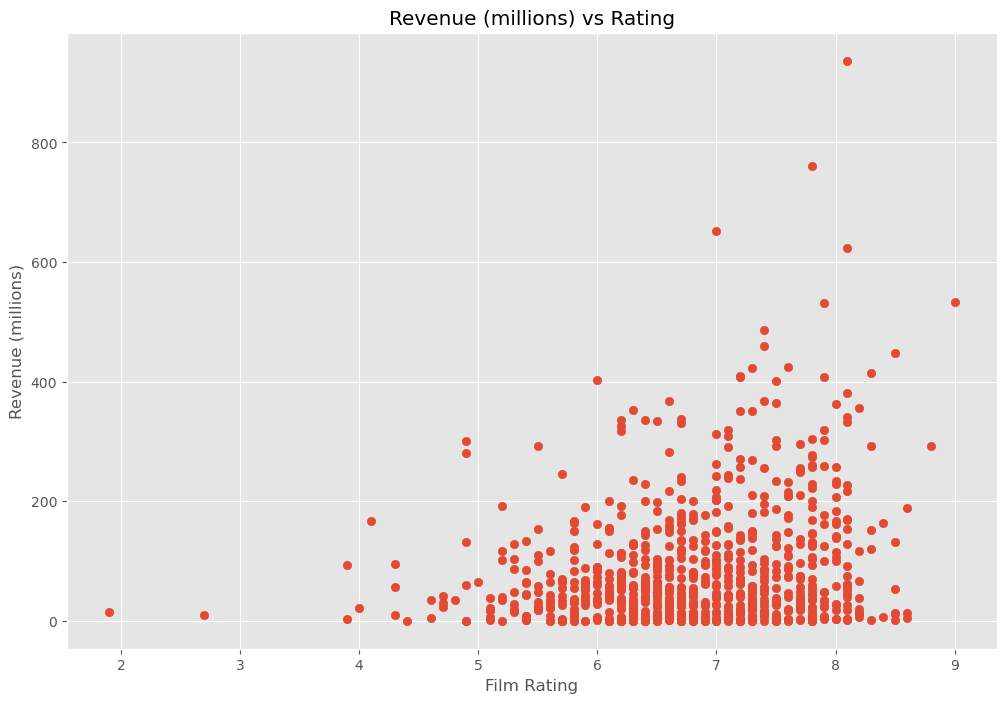

In [102]:
plt.scatter(x = df['Rating'], y = df['Revenue (Millions)'])

plt.title('Revenue (millions) vs Rating')
plt.xlabel('Film Rating')
plt.ylabel('Revenue (millions)')

plt.show()

## Rating vs Revenue (Seaborn)

<AxesSubplot:xlabel='Rating', ylabel='Revenue (Millions)'>

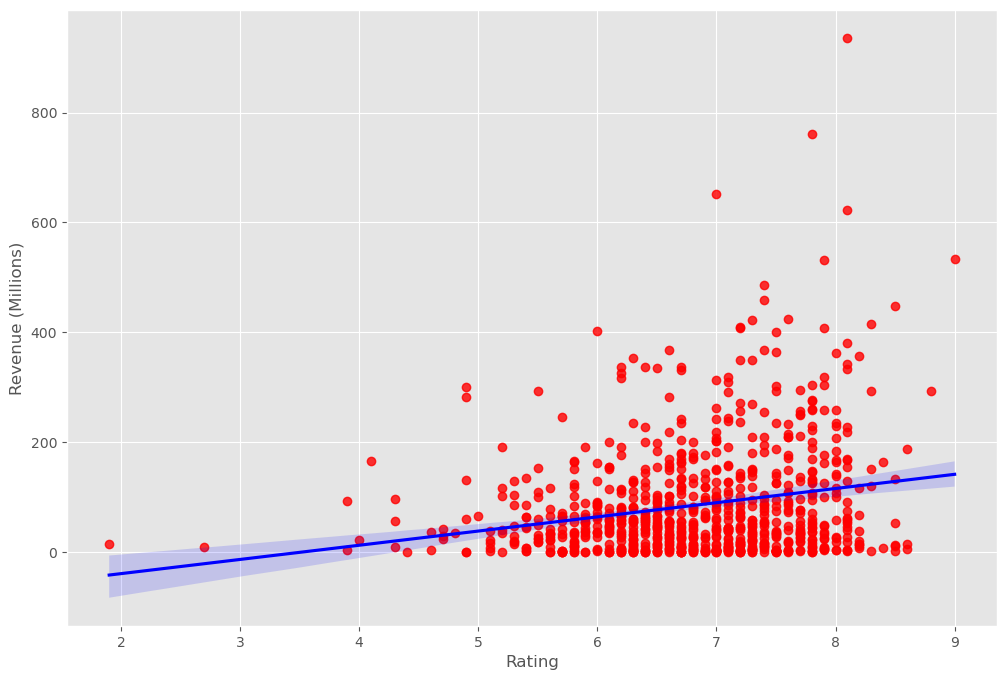

In [103]:
sns.regplot(x = 'Rating', y = 'Revenue (Millions)', data = df, scatter_kws = {'color': 'red'}, line_kws = {'color':'blue'})

## Let's see the correlation using different methods

In [104]:
df.corr(method ='pearson')

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.312809,-0.254783,-0.243125,-0.303284,-0.273170,-0.195909
Year,-0.312809,1.000000,-0.101933,-0.145703,-0.362445,-0.129198,-0.062303
Runtime (Minutes),-0.254783,-0.101933,1.000000,0.374566,0.399298,0.281721,0.221397
Rating,-0.243125,-0.145703,0.374566,1.000000,0.517452,0.217106,0.672731
Votes,-0.303284,-0.362445,0.399298,0.517452,1.000000,0.636833,0.332674
Revenue (Millions),-0.273170,-0.129198,0.281721,0.217106,0.636833,1.000000,0.142397
Metascore,-0.195909,-0.062303,0.221397,0.672731,0.332674,0.142397,1.000000


In [105]:
df.corr(method ='kendall')

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.253273,-0.172827,-0.172835,-0.157273,-0.162365,-0.131581
Year,-0.253273,1.000000,-0.065238,-0.115976,-0.381853,-0.171426,-0.033869
Runtime (Minutes),-0.172827,-0.065238,1.000000,0.258257,0.250684,0.172451,0.143028
Rating,-0.172835,-0.115976,0.258257,1.000000,0.365703,0.106715,0.518091
Votes,-0.157273,-0.381853,0.250684,0.365703,1.000000,0.510472,0.202639
Revenue (Millions),-0.162365,-0.171426,0.172451,0.106715,0.510472,1.000000,0.040646
Metascore,-0.131581,-0.033869,0.143028,0.518091,0.202639,0.040646,1.000000


In [106]:
df.corr(method ='spearman')

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.351246,-0.254856,-0.250795,-0.226026,-0.242022,-0.197331
Year,-0.351246,1.000000,-0.092057,-0.160778,-0.530443,-0.244748,-0.046932
Runtime (Minutes),-0.254856,-0.092057,1.000000,0.366017,0.359932,0.250732,0.209976
Rating,-0.250795,-0.160778,0.366017,1.000000,0.511706,0.155023,0.698497
Votes,-0.226026,-0.530443,0.359932,0.511706,1.000000,0.699920,0.292724
Revenue (Millions),-0.242022,-0.244748,0.250732,0.155023,0.699920,1.000000,0.053877
Metascore,-0.197331,-0.046932,0.209976,0.698497,0.292724,0.053877,1.000000


## Let's create correlation matrix using seaborn

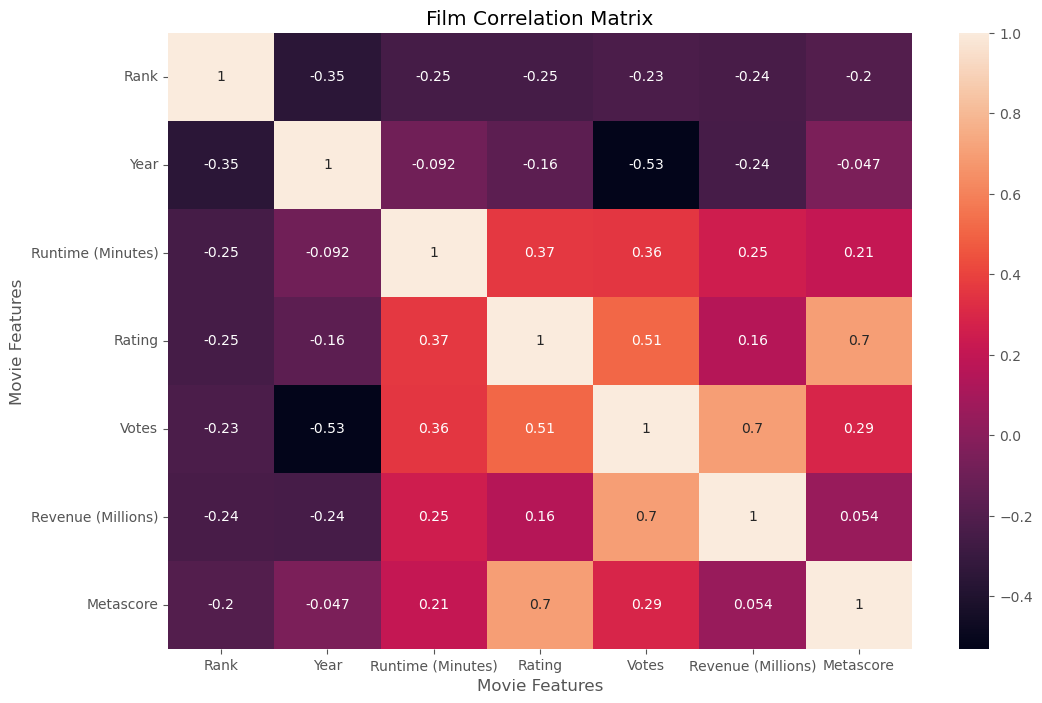

In [107]:
correlation_matrix = df.corr(method = 'spearman')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Film Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

## Surprisngly, it's not the the Rating nor the Metascore that are highly correlated with the Revenue of the films.
## Rather, it's the total number of votes.
## Also, we can observe that Rating and Metascore are highly correlated, which makes sense.
## Now, let's plot number of votes vs Revenue

<AxesSubplot:xlabel='Votes', ylabel='Revenue (Millions)'>

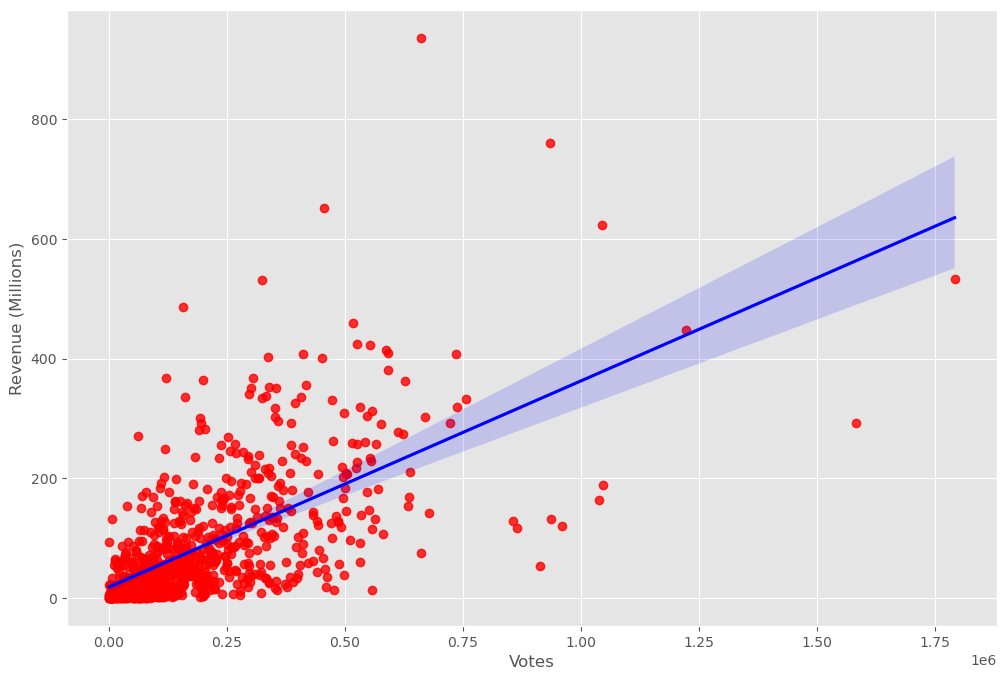

In [108]:
sns.regplot(x = 'Votes', y = 'Revenue (Millions)', data = df, scatter_kws = {'color': 'red'}, line_kws = {'color':'blue'})

## We can conclude that the total number of votes have the highest correlation to Revenue in IMDB films.